In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/IsaacST1

/content/drive/MyDrive/IsaacST1


In [3]:
!ls /content/drive/MyDrive/IsaacST1

'Australian Vehicle Prices.csv'


**1.Reading the Data Set**

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
AusPrice=pd.read_csv('/content/drive/MyDrive/IsaacST1/Australian Vehicle Prices.csv', encoding='latin')
print('Shape After deleting duplicate values:', AusPrice.shape)
AusPrice = AusPrice.dropna(subset=['Price'])
AusPrice=AusPrice.drop_duplicates()


Shape After deleting duplicate values: (16734, 19)




*   This file contains 16734 cars that listed in this file

*   There are 19 attributes that describes in the file


*   The attributes are:
Brand	Year,	Model,	Car/Suv,	Title,	UsedOrNew,	Transmission,	Engine,	DriveType,	FuelType,	FuelConsumption,	Kilometres,	ColourExtInt,	Location,	CylindersinEngine,	BodyType,	Doors,	Seats,	Price.





**2.Problem Statement Definition**


*   To predict the Australian car prices
*   Target variable is:price with other attributes like Engine, FuelConsumption, Kilometres, Doors, Seats etc



**3.Target variable identification**


Based on the problem statement we need to create a supervised ML Regression model, as the target variable is Continuous because price can take any values from certain range

**4.Visualising the distribution of Target variable**

In [7]:
if 'Price' in AusPrice.columns:
    print("'Price' column exists.")
else:
    print("'Price column doesn't exist.")




'Price' column exists.


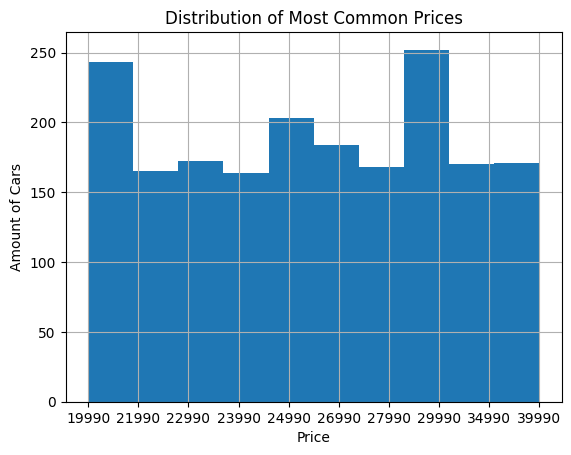

In [8]:
import matplotlib.pyplot as plt

AusPrice = AusPrice.dropna(subset=['Price'])

top_prices = AusPrice['Price'].value_counts().nlargest(10).index


filtered_data = AusPrice[AusPrice['Price'].isin(top_prices)]


sorted_data = filtered_data.sort_values(by='Price')

sorted_data['Price'].hist()

plt.title('Distribution of Most Common Prices')
plt.xlabel('Price')
plt.ylabel('Amount of Cars')
plt.show()



*   The data distribution of the target variable is not suitable for data prediction because it is not in bell-curve shape or slightly skewed
*   



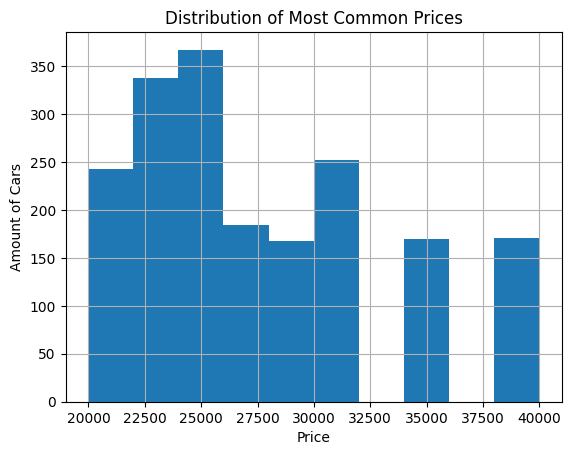

In [9]:
import numpy as np

AusPrice['Price'] = pd.to_numeric(AusPrice['Price'], errors='coerce')

AusPrice = AusPrice.dropna(subset=['Price'])

top_prices = AusPrice['Price'].value_counts().nlargest(10).index

filtered_data = AusPrice[AusPrice['Price'].isin(top_prices)]

sorted_data = filtered_data.sort_values(by='Price')

sorted_data['Price'].hist()

plt.title('Distribution of Most Common Prices')
plt.xlabel('Price')
plt.ylabel('Amount of Cars')
plt.show()

**5.Data exploration at basic level**

In [10]:
AusPrice.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990.0
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990.0
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988.0
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990.0
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990.0


In [11]:
AusPrice.tail()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
16729,Toyota,2014.0,Alphard,SYC Cars,2014 Toyota Alphard,USED,Automatic,-,Front,Unleaded,-,66000,Grey / -,"Rocklea, QLD",-,Commercial,7 Seats,NaN,29500.0
16730,Mercedes-Benz,2012.0,S-Class,USED Dealer ad,2012 Mercedes-Benz S-Class CDI BlueTEC,USED,Automatic,-,Rear,Diesel,-,117432,Silver / -,"Port Melbourne, VIC",-,NaN,NaN,NaN,39888.0
16731,Suzuki,2022.0,Vitara,Bremer Suzuki - New,2022 Suzuki Vitara 1.6L,DEMO,Automatic,"4 cyl, 1.6 L",Front,Unleaded,6.2 L / 100 km,5165,Yellow / -,"Dinmore, QLD",4 cyl,SUV,4 Doors,5 Seats,35280.0
16732,Mercedes-Benz,2016.0,GLC250,SUV,2016 Mercedes-Benz GLC250,USED,Automatic,"4 cyl, 2 L",AWD,Premium,7.2 L / 100 km,85525,Grey / Black,"Albion, QLD",4 cyl,SUV,4 Doors,5 Seats,41888.0
16733,Mercedes-Benz,2021.0,C200,Sedan,2021 Mercedes-Benz C200,USED,Automatic,"4 cyl, 2 L",Rear,Unleaded,7 L / 100 km,31852,Gold / -,"Yatala, QLD",4 cyl,Sedan,4 Doors,5 Seats,65888.0



 # Data types, Missing values based on number of non-null values Vs total rows etc.
 # Remove those variables from data which have too many missing values (Missing Values > 30%)
 # Remove Qualitative variables which cannot be used in Machine Learning


In [12]:
 AusPrice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16681 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16681 non-null  object 
 1   Year               16681 non-null  float64
 2   Model              16681 non-null  object 
 3   Car/Suv            16655 non-null  object 
 4   Title              16681 non-null  object 
 5   UsedOrNew          16681 non-null  object 
 6   Transmission       16681 non-null  object 
 7   Engine             16681 non-null  object 
 8   DriveType          16681 non-null  object 
 9   FuelType           16681 non-null  object 
 10  FuelConsumption    16681 non-null  object 
 11  Kilometres         16681 non-null  object 
 12  ColourExtInt       16681 non-null  object 
 13  Location           16232 non-null  object 
 14  CylindersinEngine  16681 non-null  object 
 15  BodyType           16402 non-null  object 
 16  Doors              15094 no

In [13]:
AusPrice.describe(include='all')

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
count,16681,16681.000000,16681,16655,16681,16681,16681,16681,16681,16681,16681,16681,16681,16232,16681,16402,15094,14993,1.668100e+04
unique,76,NaN,781,615,8785,3,3,106,5,9,157,14256,832,618,11,10,13,13,NaN
top,Toyota,NaN,Hilux,SUV,2019 Hyundai I30 Active,USED,Automatic,"4 cyl, 2 L",Front,Unleaded,-,- / -,White / -,"Minchinbury, NSW",4 cyl,SUV,4 Doors,5 Seats,NaN
freq,2782,NaN,430,5918,60,14984,14488,3937,6957,6962,1681,449,2830,544,11471,6886,11163,11285,NaN
mean,NaN,2016.214615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.730333e+04
std,NaN,5.241618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.717787e+04
min,NaN,1940.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.800000e+01
25%,NaN,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.899900e+04
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.950000e+04
75%,NaN,2020.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.399000e+04


In [14]:
AusPrice.nunique()

Brand                   76
Year                    45
Model                  781
Car/Suv                615
Title                 8785
UsedOrNew                3
Transmission             3
Engine                 106
DriveType                5
FuelType                 9
FuelConsumption        157
Kilometres           14256
ColourExtInt           832
Location               618
CylindersinEngine       11
BodyType                10
Doors                   13
Seats                   13
Price                 3793
dtype: int64

**Observations from Step 5 - Basic Exploratory Data Analysis**


Year(continuous), FuelConsumption(continuous), Kilometres(continuous), CylindersinEngine(continuous), Doors(continuous), Seats(continuous), Price(continuous)



Brand(categorical), Model(categorical), Title(categorical), UsedOrNew(categorical), Transmission(categorical), Engine(categorical), DriveType(categorical), FuelType(categorical), ColourExtInt(categorical), Location(categorical), BodyType(categorical)

**6.Identifying and Rejecting useless columns**

There are several qualitative columns in the data which are:

Brand, Model, Title, UsedOrNew, Transmission, Engine, DriveType, FuelType, ColourExtInt, Location, and BodyType.

I have decided to drop out Title, CylinderinEngine, Car/SUV because these 3 has high correlation.

In [15]:
AusPrice = AusPrice.drop(['Title', 'CylindersinEngine', 'Car/Suv'], axis=1)
print(AusPrice)

               Brand    Year    Model UsedOrNew Transmission        Engine  \
0          Ssangyong  2022.0   Rexton      DEMO    Automatic  4 cyl, 2.2 L   
1                 MG  2022.0      MG3      USED    Automatic  4 cyl, 1.5 L   
2                BMW  2022.0     430I      USED    Automatic    4 cyl, 2 L   
3      Mercedes-Benz  2011.0     E500      USED    Automatic  8 cyl, 5.5 L   
4            Renault  2022.0   Arkana      USED    Automatic  4 cyl, 1.3 L   
...              ...     ...      ...       ...          ...           ...   
16729         Toyota  2014.0  Alphard      USED    Automatic             -   
16730  Mercedes-Benz  2012.0  S-Class      USED    Automatic             -   
16731         Suzuki  2022.0   Vitara      DEMO    Automatic  4 cyl, 1.6 L   
16732  Mercedes-Benz  2016.0   GLC250      USED    Automatic    4 cyl, 2 L   
16733  Mercedes-Benz  2021.0     C200      USED    Automatic    4 cyl, 2 L   

      DriveType  FuelType FuelConsumption Kilometres   ColourEx

**7.Visual Exploratory Data Analysis of data (with Histogram and Barcharts)**

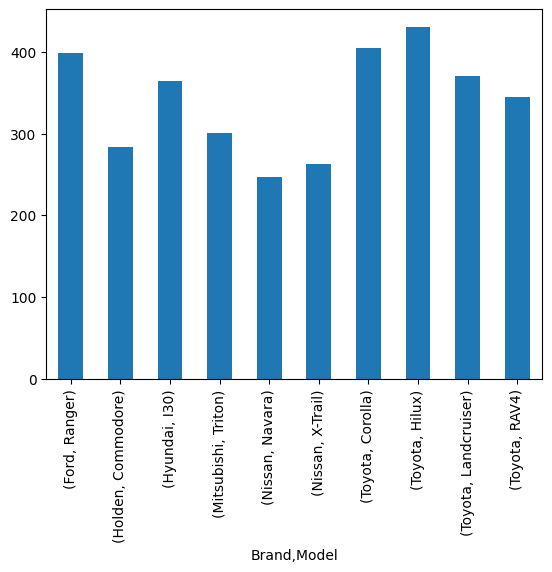

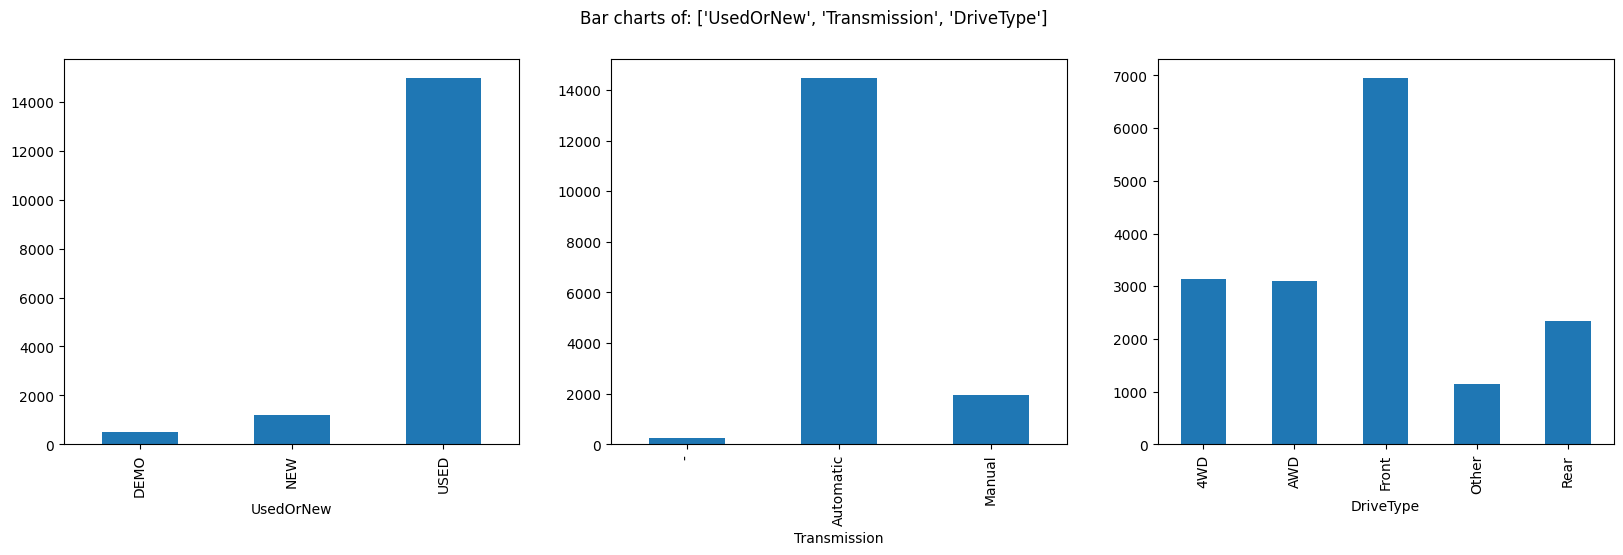

In [16]:
def PlotBarCharts(inpData, colsToPlot):

    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

top_brands_models = AusPrice.groupby(['Brand', 'Model']).size().nlargest(10).index


top_brands_models_df = AusPrice[AusPrice.set_index(['Brand', 'Model']).index.isin(top_brands_models)]


top_brands_models_df.groupby(['Brand', 'Model']).size().plot(kind='bar')

PlotBarCharts(inpData=AusPrice, colsToPlot=['UsedOrNew', 'Transmission', 'DriveType'])

**Observations from Visual Exploratory Data Analysis**

We have good distribution on brand,model but other than these, we identified that UsedOrNew, Transmission, DriveType attribute has dominating graph which is used, automatic, and front wheel drivetype.

**7.Visual Exploratory Data Analysis of data (Continuous)**

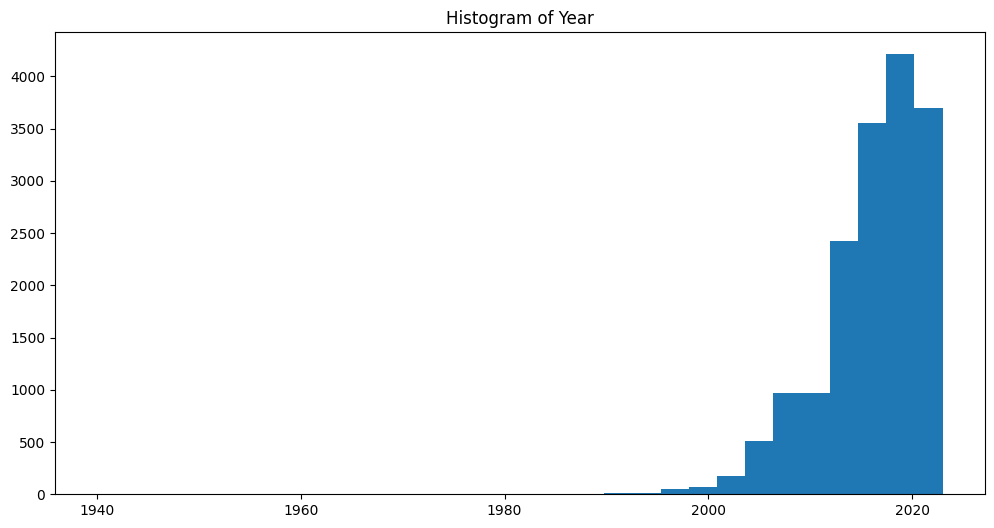

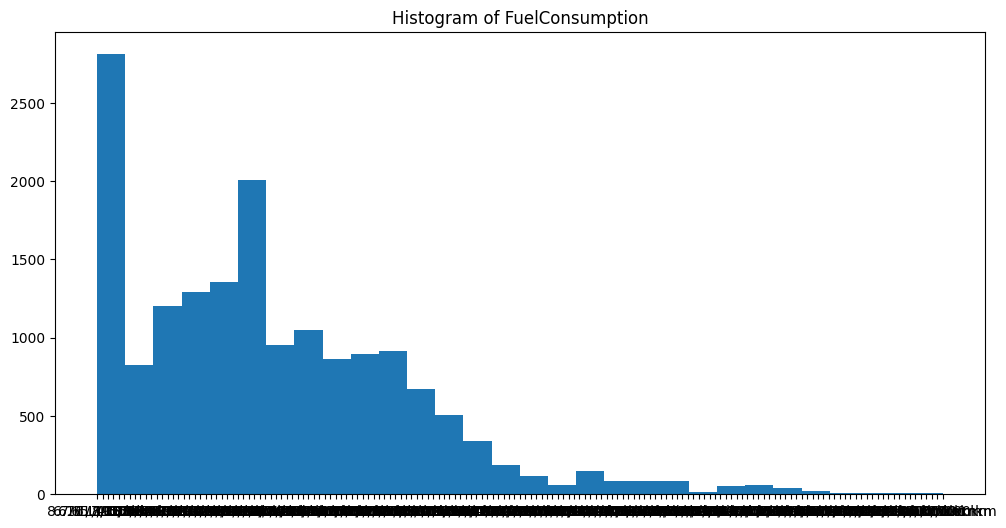

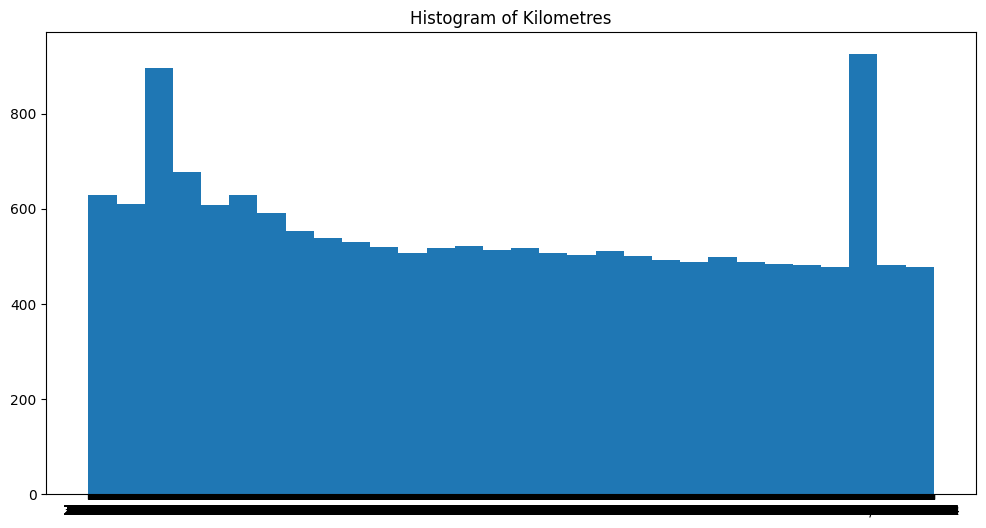

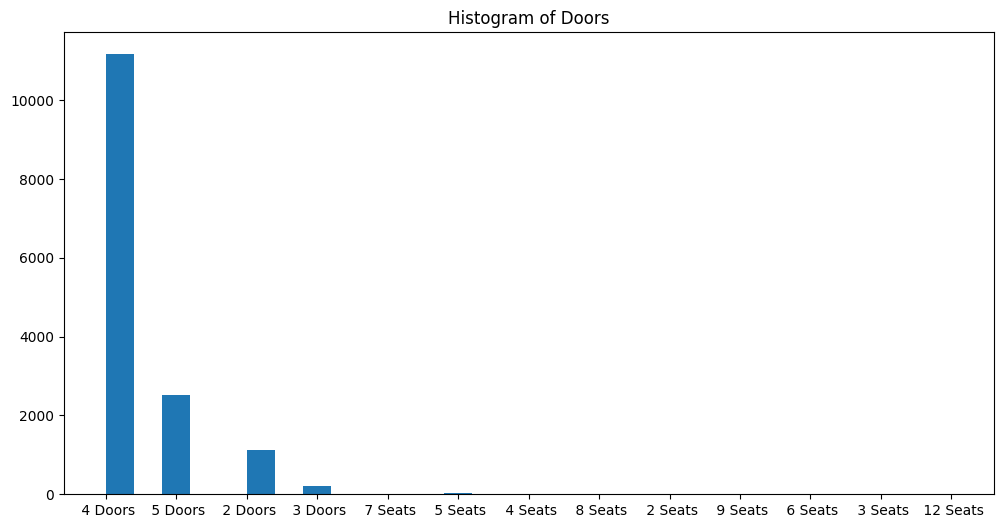

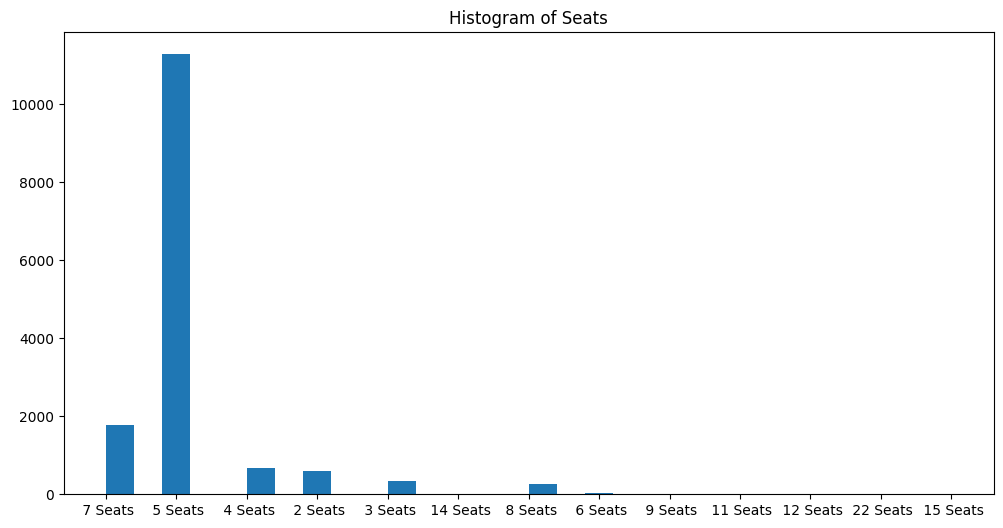

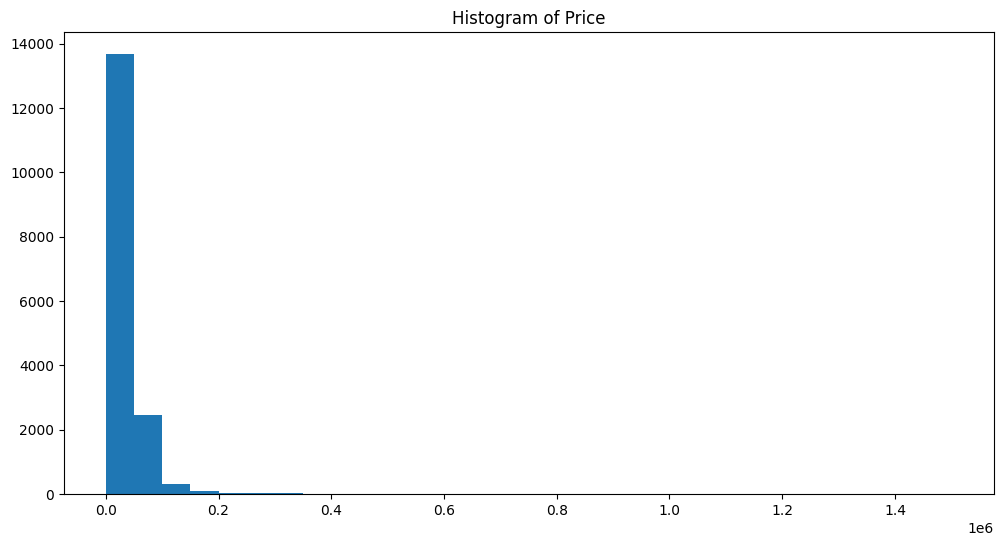

In [17]:
continuous_vars = ['Year', 'FuelConsumption', 'Kilometres', 'Doors', 'Seats', 'Price']

for var in continuous_vars:
    plt.figure(figsize=(12,6))
    plt.hist(AusPrice[var].dropna(), bins=30)
    plt.title(f'Histogram of {var}')
    plt.show()

**8.Removal of outliers and missing values**



In [18]:
AusPrice['Brand'] = pd.to_numeric(AusPrice['Brand'], errors='coerce')
AusPrice['Model'] = pd.to_numeric(AusPrice['Model'], errors='coerce')
AusPrice['Price'][AusPrice['Price']<30000].sort_values(ascending=False)



12387    29999.0
14591    29999.0
6860     29999.0
6782     29999.0
253      29999.0
          ...   
4862      1895.0
1747      1895.0
13203     1200.0
12460      900.0
15831       88.0
Name: Price, Length: 8882, dtype: float64

In [19]:
AusPrice['Price'][AusPrice['Price']>30000]=29999

array([[<Axes: title={'center': 'Price'}>]], dtype=object)

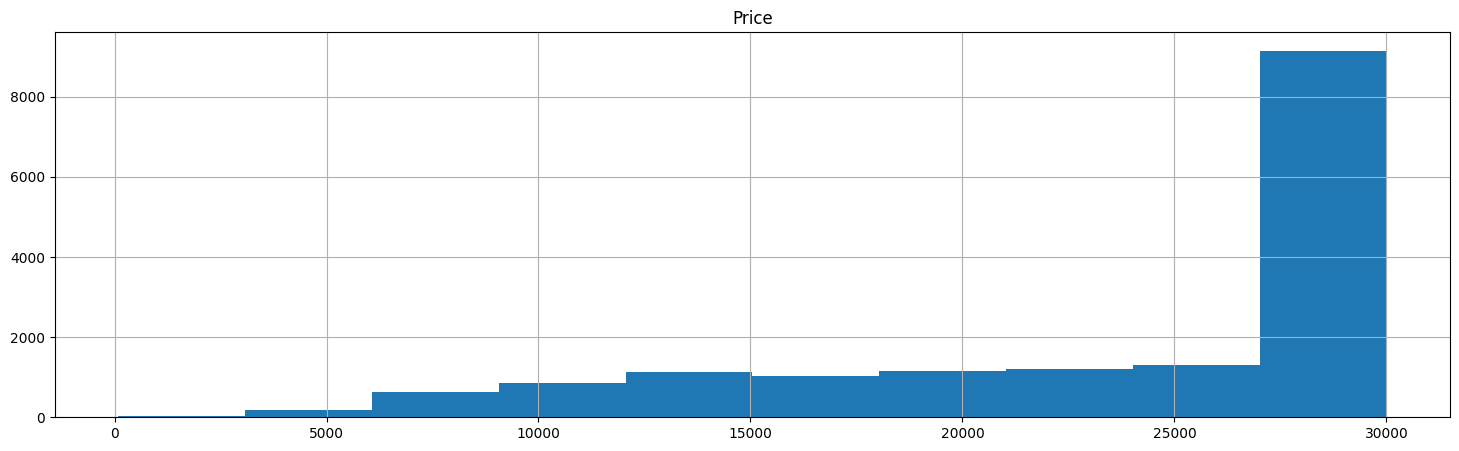

In [20]:
AusPrice.hist(['Price'], figsize=(18,5))


In [21]:
print(AusPrice.columns)

Index(['Brand', 'Year', 'Model', 'UsedOrNew', 'Transmission', 'Engine',
       'DriveType', 'FuelType', 'FuelConsumption', 'Kilometres',
       'ColourExtInt', 'Location', 'BodyType', 'Doors', 'Seats', 'Price'],
      dtype='object')


**9.Feature Selection based on data distribution**

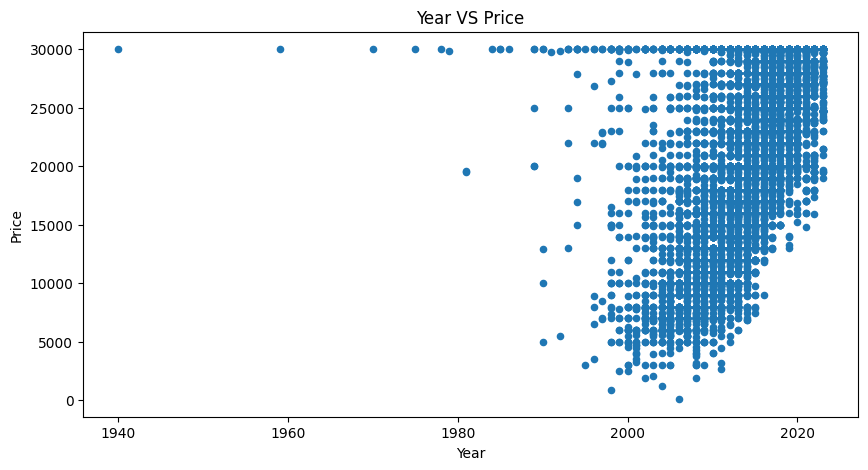

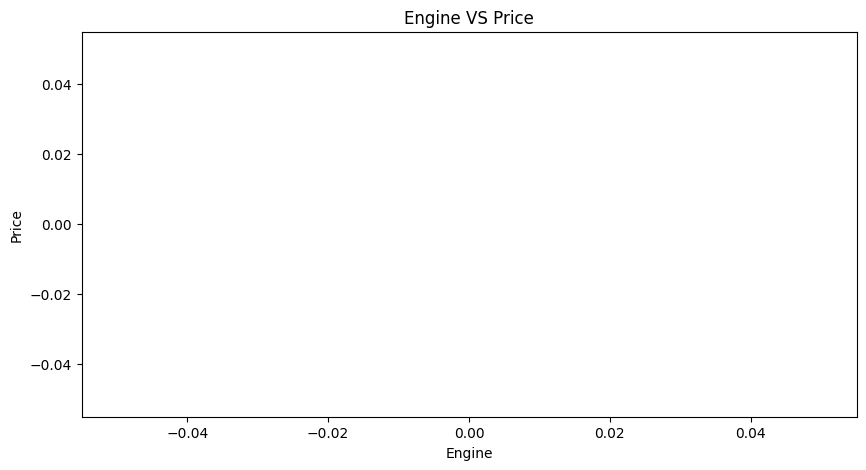

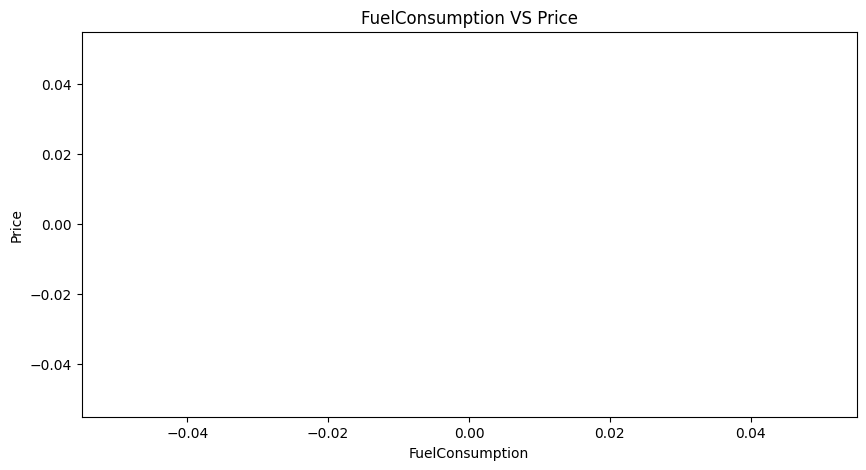

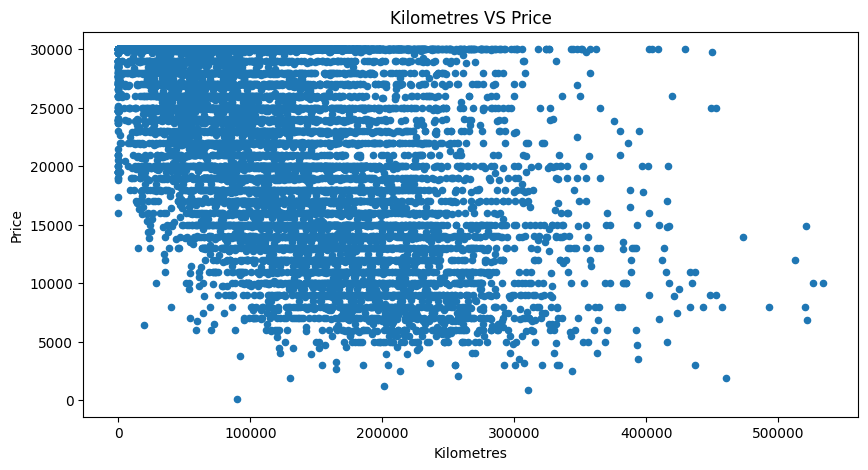

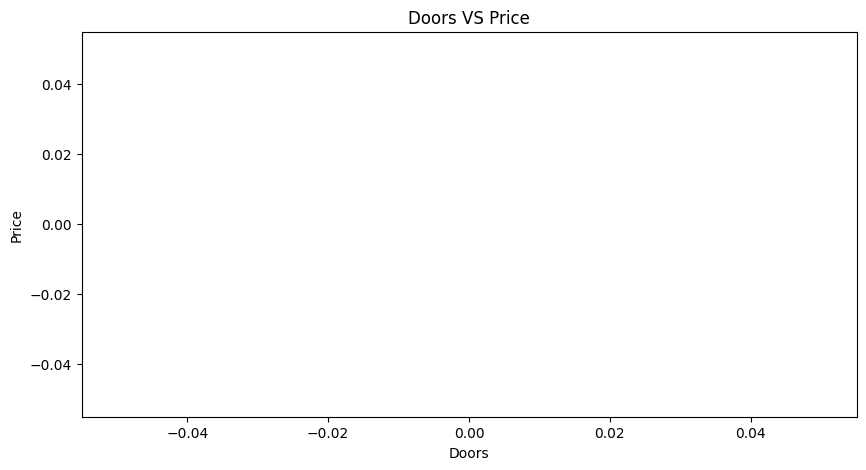

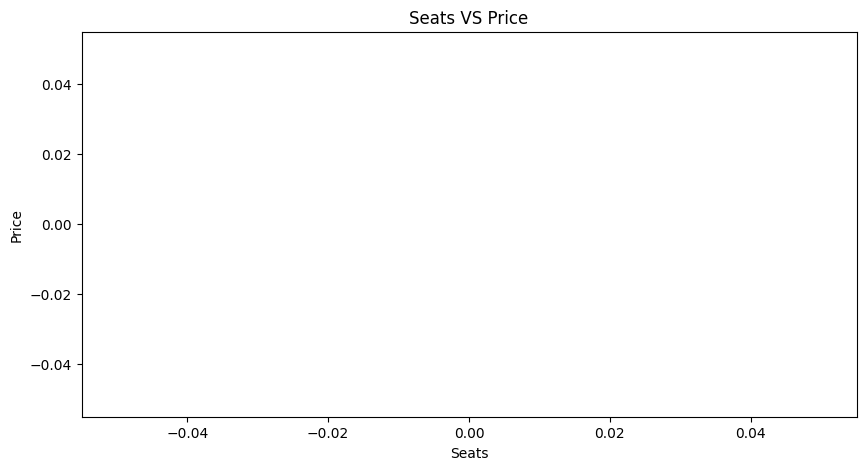

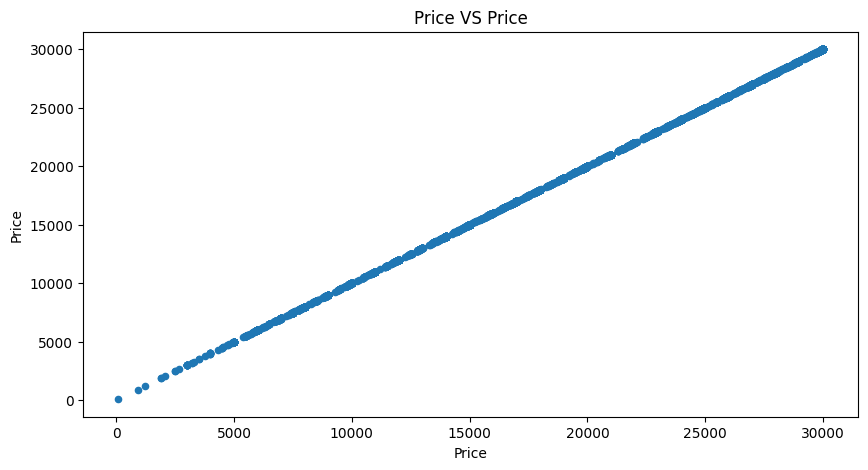

In [23]:
ContinuousCols = ['Year', 'Engine', 'FuelConsumption', 'Kilometres', 'Doors', 'Seats', 'Price']
CategoricalCols = ['Brand', 'Model', 'UsedOrNew', 'Transmission', 'DriveType', 'FuelType', 'ColourExtInt', 'Location', 'BodyType']
for col in CategoricalCols:
    AusPrice[col] = AusPrice[col].astype(str)

for col in ContinuousCols:
    AusPrice[col] = pd.to_numeric(AusPrice[col], errors='coerce')
    AusPrice[col].fillna(AusPrice[col].median(), inplace=True)


for predictor in ContinuousCols:
    AusPrice.plot.scatter(x=predictor, y='Price', figsize=(10,5), title=predictor+" VS "+ 'Price')
    plt.show()

**10.Visual and Statistic Correlation analysis for selection of best features**

In [24]:
CorrelationData = AusPrice[ContinuousCols].corr()
CorrelationData

,Year,Engine,FuelConsumption,Kilometres,Doors,Seats,Price
Year,1.000000,NaN,NaN,-0.696531,NaN,NaN,0.684969
Engine,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FuelConsumption,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kilometres,-0.696531,NaN,NaN,1.000000,NaN,NaN,-0.604029
Doors,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seats,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,0.684969,NaN,NaN,-0.604029,NaN,NaN,1.000000


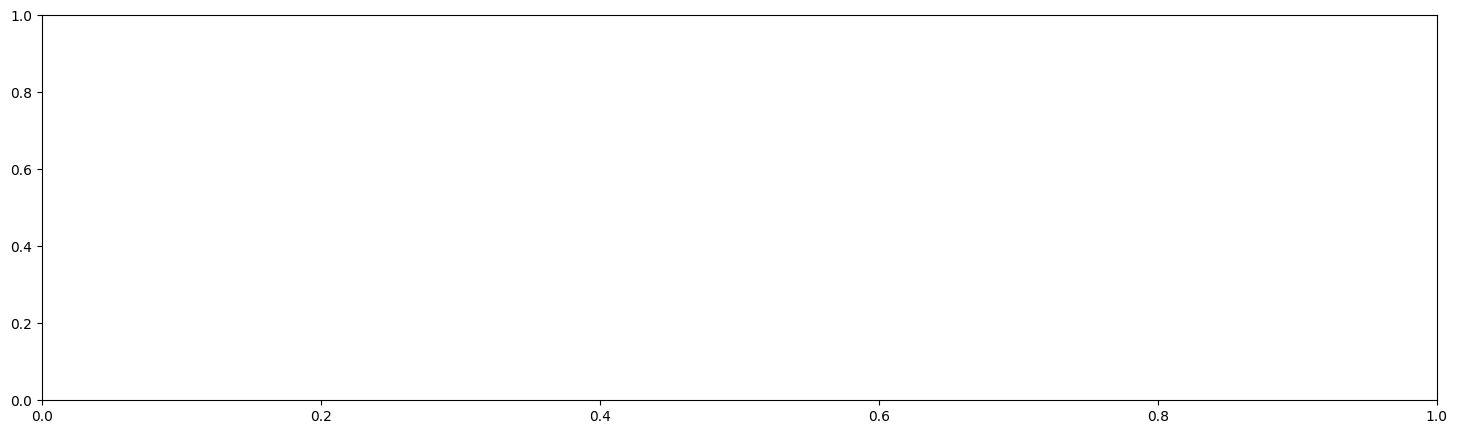

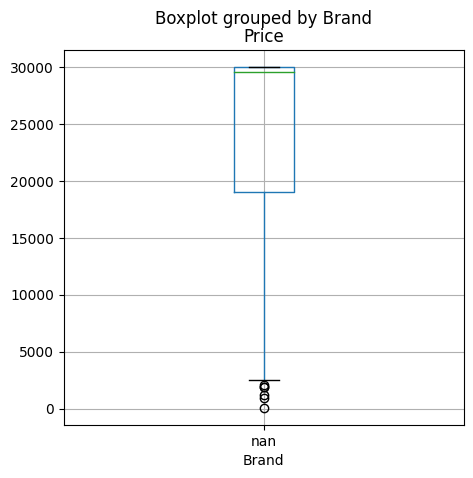

In [28]:
import matplotlib.pyplot as plt

CategoricalColsList = ['Brand']

fig, PlotCanvas = plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    AusPrice.boxplot(column='Price', by=PredictorCol, figsize=(5,5), vert=True)

**Data Conversion to numeric values for machine learning/predictive analysis**

In [35]:
AusPrice.columns

Index(['Year', 'Model', 'UsedOrNew', 'Transmission', 'Engine', 'DriveType',
       'FuelType', 'FuelConsumption', 'Kilometres', 'ColourExtInt', 'Location',
       'BodyType', 'Doors', 'Seats', 'Price', 'Brand_0'],
      dtype='object')

In [39]:
mapping_dict = {'Brand_0': {'Toyota': 1, 'Hyundai': 2, 'Ford': 3}}
AusPrice.replace(mapping_dict, inplace=True)

In [48]:
AusPrice['Model'] = AusPrice['Model'].fillna(AusPrice['Model'].mode().iloc[0])
AusPrice['Location'] = AusPrice['Location'].fillna(AusPrice['Location'].mode().iloc[0])

In [51]:
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway
    SelectedPredictors=[]
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    return(SelectedPredictors)

CategoricalPredictorList=['Year', 'Model', 'UsedOrNew', 'Transmission', 'DriveType',
       'FuelType', 'ColourExtInt', 'Location', 'BodyType']
FunctionAnova(AusPrice, 'Price', CategoricalPredictorList)

##### ANOVA Results ##### 

Year is correlated with Price | P-Value: 0.0
Model is correlated with Price | P-Value: 1.4734027883310447e-64
UsedOrNew is correlated with Price | P-Value: 3.4250965547456986e-220
Transmission is correlated with Price | P-Value: 4.013941716296571e-165
DriveType is correlated with Price | P-Value: 1.5779290128574142e-203
FuelType is correlated with Price | P-Value: 0.0
ColourExtInt is correlated with Price | P-Value: 3.2731954978272975e-143
Location is correlated with Price | P-Value: 0.0
BodyType is correlated with Price | P-Value: 0.0


['Year',
 'Model',
 'UsedOrNew',
 'Transmission',
 'DriveType',
 'FuelType',
 'ColourExtInt',
 'Location',
 'BodyType']

**Selecting nal Predictors/Features for building Machine Learning/AI model**

In [52]:
SelectedColumns=['Model', 'UsedOrNew', 'Transmission', 'DriveType', 'ColourExtInt']

DataForML=AusPrice[SelectedColumns]
print(DataForML.head())

DataForML.to_pickle('DataForML.pkl')

  Model UsedOrNew Transmission DriveType   ColourExtInt
0   nan      DEMO    Automatic       AWD  White / Black
1   nan      USED    Automatic     Front  Black / Black
2   nan      USED    Automatic      Rear   Grey / White
3   nan      USED    Automatic      Rear  White / Brown
4   nan      USED    Automatic     Front   Grey / Black


In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
import numpy as np

DataForML_Numeric = pd.read_pickle('DataForML.pkl')
Predictors = DataForML_Numeric.columns.tolist()
Predictors.remove('Price')
TargetVariable = 'Price'

X = DataForML_Numeric[Predictors].values
y = DataForML_Numeric[TargetVariable].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

RegModel = LinearRegression()

LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

TestingDataResults['APE']=100 * ((abs(
TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)

def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)

custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

R2 Value: 0.2587669907860589
Mean Accuracy on test data: -1442528892279.0337
Median Accuracy on test data: 82.13607120237342

Accuracy values for 10-fold Cross Validation:
 [-2.17925291e+12 -7.33828137e+11 -4.07962319e+11 -7.18627589e+10
 -4.41743050e+11 -7.80822767e+10 -1.67400939e+12 -3.48553345e+12
 -6.59324766e+09 -1.93973626e+12]

Final Average Accuracy of the model: -1101860379477.05


R2 Value: 0.26272038316931423
Mean Accuracy on test data: 67.08963244422416
Median Accuracy on test data: 82.91732490784624

Accuracy values for 10-fold Cross Validation:
 [63.94250457 61.52468728 68.35637283 69.29117091 68.54901208 68.18808137
 65.10802831 66.40650195 71.57962472 62.55463829]

Final Average Accuracy of the model: 66.55


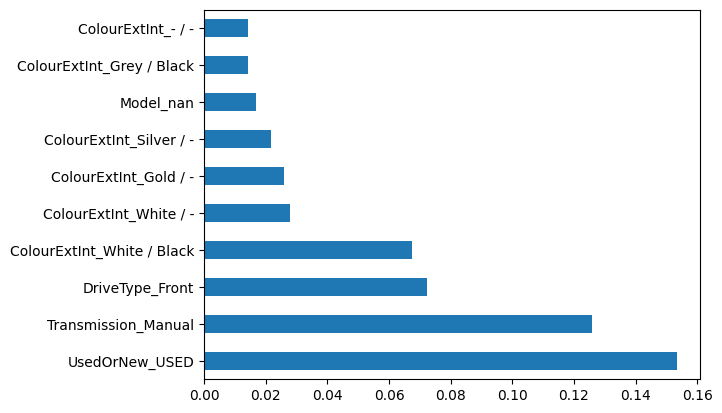

In [56]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

DataForML_Numeric = pd.read_pickle('DataForML.pkl')

Predictors = DataForML_Numeric.columns.tolist()
Predictors.remove('Price')
TargetVariable = 'Price'

X = DataForML_Numeric[Predictors].values
y = DataForML_Numeric[TargetVariable].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

TestingDataResults['APE']=100 * ((abs(
TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)

def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)

custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

In [57]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
import numpy as np

DataForML_Numeric = pd.read_pickle('DataForML.pkl')

Predictors = DataForML_Numeric.columns.tolist()
Predictors.remove('Price')
TargetVariable = 'Price'

X = DataForML_Numeric[Predictors].values
y = DataForML_Numeric[TargetVariable].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
RegModel = KNeighborsRegressor(n_neighbors=3)

KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

TestingDataResults['APE']=100 * ((abs(
TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)

def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)

custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

R2 Value: 0.12126917149480698
Mean Accuracy on test data: 66.00254320020997
Median Accuracy on test data: 84.35614520484016

Accuracy values for 10-fold Cross Validation:
 [63.42414426 60.3867441  64.72533363 66.49913756 65.5194667  66.2826382
 63.54427392 63.14937999 66.31859349 59.22855511]

Final Average Accuracy of the model: 63.91


In [58]:
from sklearn import svm

RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

print(RegModel)

SVM = RegModel.fit(X_train, y_train)
prediction = SVM.predict(X_test)

from sklearn import metrics
print('R2 Value:', metrics.r2_score(y_train, SVM.predict(X_train)))

print('\n##### Model Validation and Accuracy Calculations ##########')
TestingDataResults = pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable] = y_test
TestingDataResults[('Predicted' + TargetVariable)] = np.round(prediction)

TestingDataResults['APE'] = 100 * ((abs(
    TestingDataResults[TargetVariable] - TestingDataResults['Predicted' + TargetVariable])) / TestingDataResults[TargetVariable])
MAPE = np.mean(TestingDataResults['APE'])
MedianMAPE = np.median(TestingDataResults['APE'])
Accuracy = 100 - MAPE
MedianAccuracy = 100 - MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)

def Accuracy_Score(orig, pred):
    MAPE = np.mean(100 * (np.abs(orig - pred) / orig))
    return (100 - MAPE)

from sklearn.metrics import make_scorer
custom_Scoring = make_scorer(Accuracy_Score, greater_is_better=True)

from sklearn.model_selection import cross_val_score

Accuracy_Values = cross_val_score(RegModel, X, y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))

SVR(C=50, gamma=0.01)
R2 Value: -0.2819650258941617

##### Model Validation and Accuracy Calculations ##########
Mean Accuracy on test data: 56.139418143341004
Median Accuracy on test data: 93.2464415480516

Accuracy values for 10-fold Cross Validation:
 [49.44486538 47.39245508 59.94732421 62.25769214 59.62300174 58.80242653
 52.6342331  55.60033503 66.47268652 47.83416334]

Final Average Accuracy of the model: 56.0
